# 546 (Optimization for Learning and Control) hw1

You are welcome (and encouraged) to work with others, but each individual must submit their own writeup.

You are welcome to use your preferred computational toolkit -- upload the **commented** sourcecode alongside your writeup (e.g. the .ipynb file).

You are welcome to consult research articles and other materials -- upload a .pdf of the article alongside your writeup and indicate which references were used where in the writeup.

# optimization and learning for control

***Purpose:***  this sequence of exercises will introduce you to the basic concepts, problems, and techniques we'll explore throughout the course.  If you don't understand what a problem is asking or how to approach it, it's very likely there are other folks in the same boat -- please ask questions at Office Hours or on Canvas Discussions.  The problems are designed to stretch your thinking and abilities -- I encourage you to make a genuine attempt on every problem, but don't spin your wheels if you're not making good progress.

## optimization algorithms

Consider the following cost function of a scalar decision variable $u\in\mathbb{R}$:

$$ c(u) = \frac{u^{6}}{6} - \frac{7 u^{5}}{5} + \frac{17 u^{4}}{4} - \frac{17 u^{3}}{3} + 3 u^{2}. $$

a. Plot $c(u)$, $D c(u)$, and $D^2 c(u)$ for scalar $u$; use the `subplot(3,1,n)` for `n = 1, 2, 3` to align the $u$-axes of the three plots.

Text(0.5, 0, 'value of $u$')

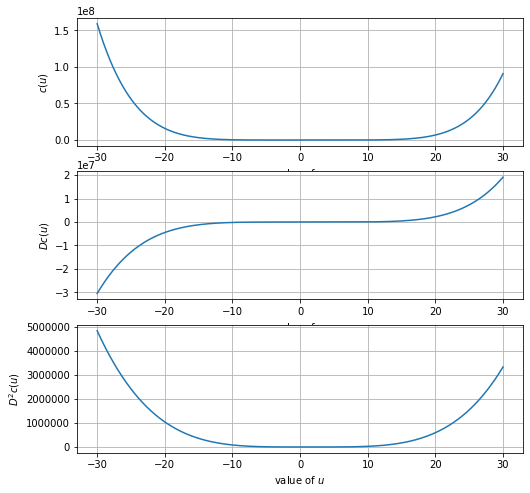

In [ ]:
import numpy as np
import pylab as plt
import scipy as sp
from scipy import linalg as la
import scipy.optimize as opt
import scipy.stats as stats
from scipy.misc import derivative
%matplotlib inline

# Set figure properties
figsize = (8,8)
fig = plt.figure(figsize=figsize)

# Define function
def c(u): return u**6/6.0-7*u**5/5.0+17*u**4/4.0-17*u**3/3.0+3*u**2
def Dc(u): return derivative(c,u, dx=0.0001)
def DDc(u): return derivative(Dc,u, dx=0.0001)

u = np.linspace(-30,30,10000)
ax1 = plt.subplot(3,1,1); ax1.grid('on')
ax1.plot(u,c(u))
ax1.set_ylabel('$c(u)$')
ax1.set_xlabel('value of $u$')

ax2 = plt.subplot(3,1,2); ax2.grid('on')
ax2.plot(u,Dc(u))
ax2.set_ylabel('$Dc(u)$')
ax2.set_xlabel('value of $u$')

ax3 = plt.subplot(3,1,3); ax3.grid('on')
ax3.plot(u,DDc(u))
ax3.set_ylabel('$D^2c(u)$')
ax3.set_xlabel('value of $u$')

b. What is the minimum of $c$?  What is the minimizing $u$?

***Notice:*** $Dc(u^*) = 0$ and $D^2 c(u^*) > 0$ at the minimizing $u^*$ (similarly, $Dc(u_*) = 0$ and $D^2 c(u_*) < 0$ at the maximizing $u_*$) -- such points are termed ***stationary*** for reasons that will become clear in the next problem.

<font color='red'>The minimum $c$ is: $-0.449956$</font>

<font color='red'>The minimizing $u$ is: $2.9973$</font>


In [ ]:
[u_min, c_min,success,iter] = opt.fminbound(c, 0, 6, full_output=True)
print("Approach 1: Using fminbound function:")
print("The minimum c is:    ","%0.6f" % c_min)
print("The minimizing u is: ","%0.6f\n" % u_min)

u_min = u[0]
for u_tmp in u:
  if abs(Dc(u_tmp))<abs(Dc(u_min)) and DDc(u_tmp)>0:
    u_min = u_tmp
print("Approach 2: Based on Dc(u) and D^2c(u) values:")
print("The minimum c is:    ","%0.6f" % c(u_min))
print("The minimizing u is: ","%0.6f\n" % u_min)

u_min = u[0]
for u_tmp in u:
  if c(u_tmp)<c(u_min):
    u_min = u_tmp
print("Approach 3: Directly compare c(u) values:")
print("The minimum c is:    ","%0.6f" % c(u_min))
print("The minimizing u is: ","%0.6f\n" % u_min)

Approach 1: Using fminbound function:
The minimum c is:     0.000000
The minimizing u is:  0.000005

Approach 2: Based on Dc(u) and D^2c(u) values:
The minimum c is:     0.350000
The minimizing u is:  1.005101

Approach 3: Directly compare c(u) values:
The minimum c is:     -0.449956
The minimizing u is:  2.997300



c. Run the (***gradient descent***) iteration

$$ u^+ = u - \gamma\, d(u) $$

using the actual derivative $d(u) = Dc(u)$ starting from multiple initial $u$'s and with multiple values of the parameter $\gamma > 0$.  Describe all of the outcomes (i.e. asymptotic behavior of the iteration) you observe and provide plots that illustrate these outcomes.

***Notice:*** you should observe that ***stationary points*** (where $Dc = 0$) are ***fixed points*** for this iteration, and that minimizers are (locally) attracting points for this iteration.


<font color='red'><b>Experiment 1</b>: Overshoot and eventually converged to local minimum</font>

<font color='red'>$\quad$- parameter $\gamma=3e-4$</font>

<font color='red'>$\quad$- initial $u=10$</font>

<font color='red'>$\quad$- max iteration$=100$</font>

<font color='red'><b>Experiment 2</b>: No overshoot and eventually converged to local minimum</font>

<font color='red'>$\quad$- parameter $\gamma=1e-3$</font>

<font color='red'>$\quad$- initial $u=-2.5$</font>

<font color='red'>$\quad$- max iteration$=100$</font>

<font color='red'><b>Experiment 3</b>: Overshoot and converged after oscillation to local minimum</font>

<font color='red'>$\quad$- parameter $\gamma=1.27e-3$</font>

<font color='red'>$\quad$- initial $u=-5$</font>

<font color='red'>$\quad$- max iteration$=100$</font>

<font color='red'><b>Experiment 4</b>: Overshoot and diverged after oscillation</font>

<font color='red'>$\quad$- parameter $\gamma=2.573e-3$</font>

<font color='red'>$\quad$- initial $u=-4.0000286$</font>

<font color='red'>$\quad$- max iteration$=10$</font>

<font color='red'><b>Experiment 5</b>: Oscillates around global minimum</font>

<font color='red'>$\quad$- parameter $\gamma=2e-3$</font>

<font color='red'>$\quad$- initial $u=3$</font>

<font color='red'>$\quad$- max iteration$=300$</font>

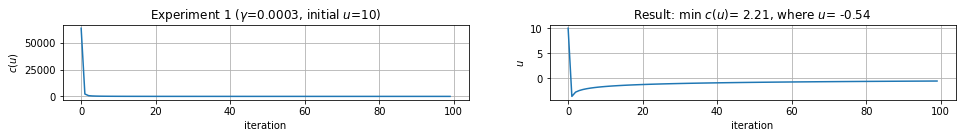

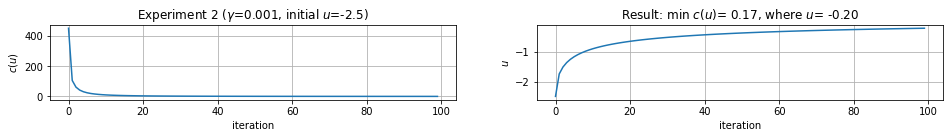

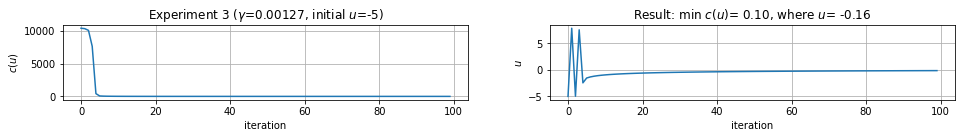

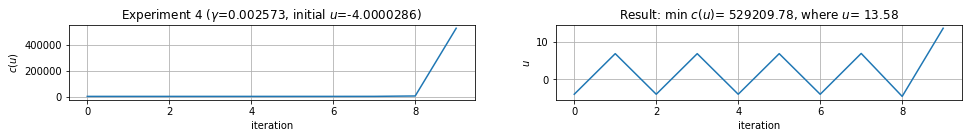

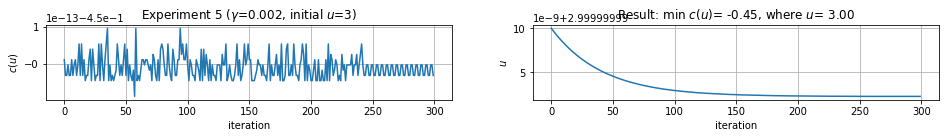

In [ ]:
# Parameter settings
max_iter_list = [100,100,100,10,300]
r_list = [3e-4,1e-3,1.27e-3,2.573e-3, 2e-3]
u_init_list = [10, -2.5, -5, -4.0000286, 3]

# Start experiments
for exp in range(len(r_list)):
 
 # Initialization settings
  max_iter = max_iter_list[exp]
  r = r_list[exp]

  u_descent = [0 for i in range(max_iter)]
  c_descent = [0 for i in range(max_iter)]
  u_descent[0] = u_init_list[exp]
  c_descent[0] = c(u_descent[0])

  # Calculate interative update results
  for i in range(max_iter-1):
    u_plus = u_descent[i] - r*Dc(u_descent[i])
    u_descent[i+1] = u_plus
    c_descent[i+1] = c(u_plus)

  # Load display stuff
  figsize = (16,8)
  plt.figure(figsize=figsize)
  
  # Draw results
  ax1 = plt.subplot(len(r_list),2,1); ax1.grid('on')
  ax1.plot(range(max_iter),c_descent)
  ax1.set_ylabel('$c(u)$')
  ax1.set_xlabel('iteration')
  ax1.set_title('Experiment '+str(exp+1)+' ($\gamma$='+str(r)+', initial $u$='+str(u_descent[0])+')')

  ax2 = plt.subplot(len(r_list),2,2); ax2.grid('on')
  ax2.plot(range(max_iter),u_descent)
  ax2.set_ylabel('$u$')
  ax2.set_xlabel('iteration')
  ax2.set_title('Result: min $c(u)$= '+str("%0.2f" % c_descent[max_iter-1])+', where $u$= '+str("%0.2f" % u_descent[max_iter-1]))

d. Run the iteration above using the (***finite differences***) approximation

$$ d(u) = \frac{1}{\Delta}( c(u + \Delta) - c(u) ) $$

starting from multiple initial $u$'s and with multiple values of the parameters $\gamma, \Delta > 0$.  Describe all of the outcomes you observe and provide plots that illustrate these outcomes.  Does $\gamma > \Delta$ or $\Delta > \gamma$ give better results?

<font color='red'>Mathematically, if we substitute $d(u)$ in the gradient descent equation:
$$ u^+ = u - \gamma\, d(u) $$
with the finite differences aproximation equation
$$d(u) = \frac{1}{\Delta}( c(u + \Delta) - c(u) )$$
, we will get
$$ u^+ = u - \, \frac{\gamma}{\Delta}( c(u + \Delta) - c(u) ) $$
In this case, by picking $\gamma > \Delta$, the fraction $\frac{\gamma}{\Delta}$ will be greater than $1$. This means the system is updating (optimizing) variable $u$ at a rate (step size) greater than the step-wise difference in $c(u)$. Therefore, the system tends to correct itself more drastically, and is more prone to overshooting and oscillation. </font>

<font color='red'>This, however, does not always guarantee better performance (efficiency and accuracy), the blue line in the experiments below represents the case with the greatest $\frac{\gamma}{\Delta}$ ratio. In Experiment 5, such parameter settings yield faster convergence. Yet, it prolongs the convergence by introducing more oscillation in Experiment 4 and even accidentally bounces the system to a local minimum in Experiment 3. </font>

<font color='red'>It is also interesting to note that Experiment 4 diverged in the previous problem (problem c.), but here using the finite differences equation, it actually converges (although at $\Delta=0.002001$, the orange line seems to got caught at some local minimum point).
</font>

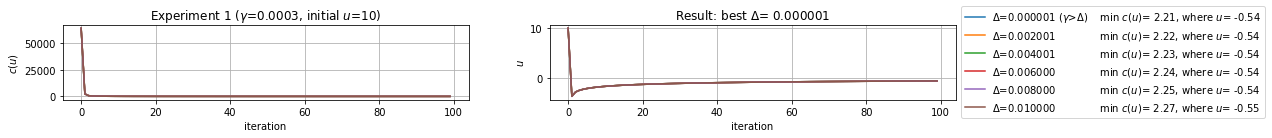

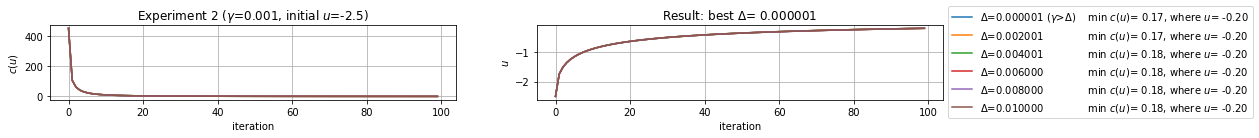

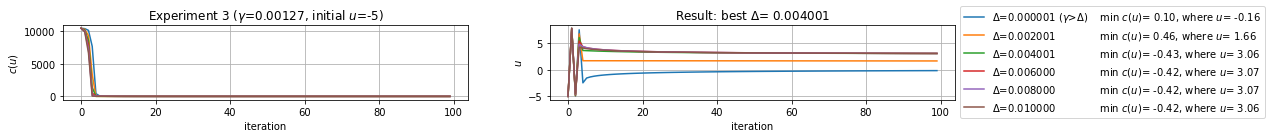

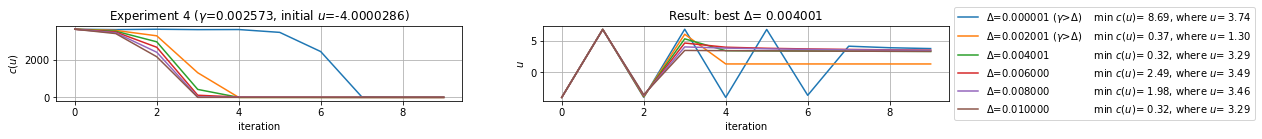

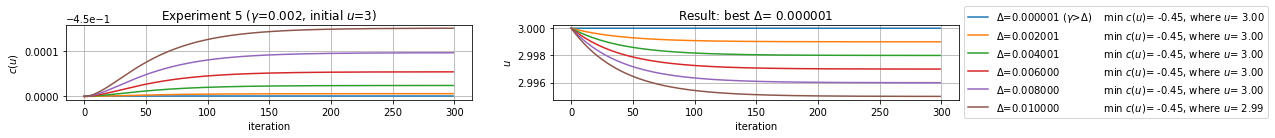

In [ ]:
# Parameter settings
max_iter_list = [100,100,100,10,300]
r_list = [3e-4,1e-3,1.27e-3,2.573e-3, 2e-3]
u_init_list = [10, -2.5, -5, -4.0000286, 3]
delta_list = np.linspace(1e-6,1e-2,6)

# Define finite difference function
def d(u,delta): return (c(u+delta)-c(u))/delta

# Start experiments
for exp in range(len(r_list)):

  # Load display stuff
  figsize = (16,8)
  plt.figure(figsize=figsize)
  ax1 = plt.subplot(len(r_list),2,1); ax1.grid('on')
  ax2 = plt.subplot(len(r_list),2,2); ax2.grid('on')

  # Initialization settings
  max_iter = max_iter_list[exp]
  r = r_list[exp]

  u_descent = [0 for i in range(max_iter)]
  c_descent = [0 for i in range(max_iter)]
  u_descent[0] = u_init_list[exp]
  c_descent[0] = c(u_descent[0])

  u_best = u_descent[0]
  c_best = c_descent[0]
  delta_best = delta_list[0]

  # Set delta value
  for delta in delta_list:
    # Calculate interative update results
    for i in range(max_iter-1):
      u_plus = u_descent[i] - r*d(u_descent[i],delta)
      u_descent[i+1] = u_plus
      c_descent[i+1] = c(u_plus)
    
    # Compare results
    if c_descent[max_iter-1]<c_best:
      u_best = u_descent[max_iter-1]
      c_best = c_descent[max_iter-1]
      delta_best = delta

    # Draw results
    ax1.plot(range(max_iter),c_descent)
    if r>delta:
      ax2.plot(range(max_iter),u_descent, label="$\Delta$="+"%0.6f" % delta+
               " ($\gamma$>$\Delta$)    min $c(u)$= "+str("%0.2f" % c_descent[max_iter-1])+
               ', where $u$= '+str("%0.2f" % u_descent[max_iter-1]))
    else:
      ax2.plot(range(max_iter),u_descent, label="$\Delta$="+"%0.6f" % delta+
               "              min $c(u)$= "+str("%0.2f" % c_descent[max_iter-1])+
               ', where $u$= '+str("%0.2f" % u_descent[max_iter-1]))

# Add text on plots
  ax1.set_ylabel('$c(u)$')
  ax1.set_xlabel('iteration')
  ax1.set_title('Experiment '+str(exp+1)+' ($\gamma$='+str(r)+', initial $u$='+str(u_descent[0])+')')

  ax2.set_ylabel('$u$')
  ax2.set_xlabel('iteration')
  ax2.set_title('Result: best $\Delta$= '+str("%0.6f" % delta_best))
  ax2.legend(loc="center left", bbox_to_anchor=(1,0.5))

e. Run the (***simple random search***) iteration

$$ u^+ = u - \frac{\gamma}{N \Delta} \sum_{n = 1}^N ( c(u + \Delta u_n) - c(u) ) \cdot u_n,\ u_n \sim \mathcal{N}(u,\sigma^2) $$

starting from multiple initial $u$'s and with multiple values of the parameters $\gamma, \Delta, \sigma > 0$, where $\mathcal{N}(u,\sigma^2)$ denotes a ***normal*** or ***Gaussian*** distribution with mean $u$ and variance $\sigma^2$.  Describe all of the outcomes (i.e. asymptotic behavior of the iteration) you observe and provide plots that illustrate these outcomes.  How should $\sigma$ relate to $\gamma$, $\Delta$?

<font color='red'> A large $\gamma$ indicates that the iterative correction of value $u$ in response to the expected change of $c(u)$ in the neighborhood is more drastic, whereas a large $\Delta$ reflects that the system calculates the difference of $c(u)$ value around the neighborhood with a larger step size away from $u$. In the meantime, the standard deviation $\sigma$ represents how spread out the probability distribution of $u_n$ is, namely, how likely the system is going to explore the $c$ values of further neighbors. That being said, large $\sigma$ allows higher chance for the system to escape local minimum, but small $\sigma$ prevents oscillation. 
</font>

<font color='red'> 
Experiment 1-3 below is a set of tests with fixed $\gamma$ and initial $u$ while $\Delta$ gradually increases. As we can see, Experiment 1 leads to convergence to global minimum for all $\sigma$ values; in Experiment 2, the red and green lines (two tests with the largest $\sigma$s) jumped to some local minimum; and in Experiment 3, the red line jumps away again but slowly navigate its way back. We can conclude that the increase of $\Delta$ and $\sigma$ together results in more chance to explore a bigger neighborhood (with big $\Delta$), while ensuring the system takes balanced samples of both the closer and further neighbors (with big $\sigma$) to hopefully cancel out the effects from the local minimums (which can be hilly and misleading) and aim for the relatively global trend (gradient).

Experiment 4-6 is another set of tests with fixed $\gamma$ and initial $u$ while $\Delta$ gradually increases. However, this set of tests is a counter example of how large $\Delta$ and $\sigma$ are not always ideal. In this case, the initial $u$ is already extrememly close to the lobal optimum, and the red line shows how with both large $\Delta$ and $\sigma$, the $u$ jumps away to another local optimal point.
 </font>

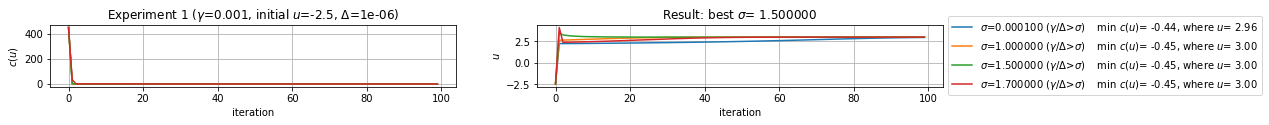

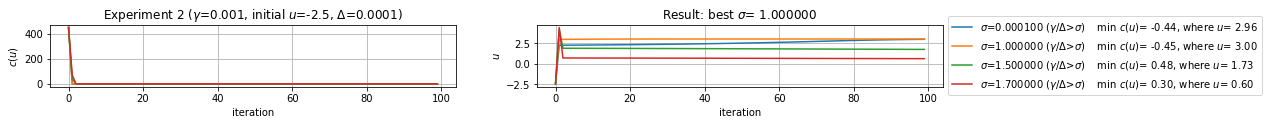

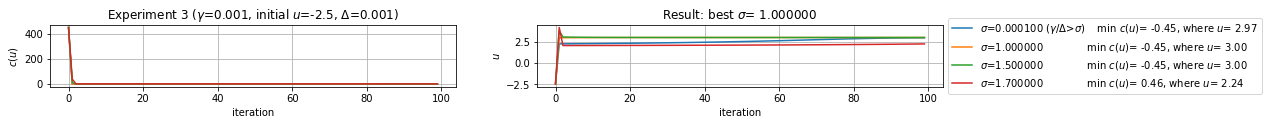

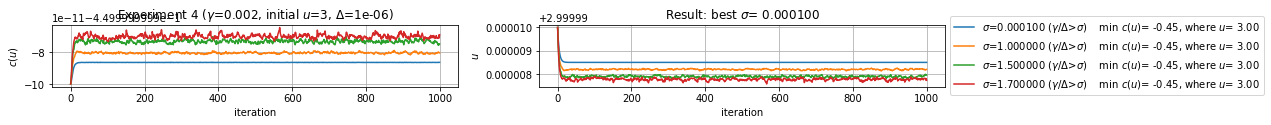

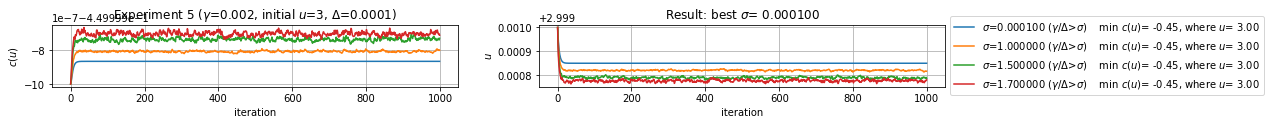

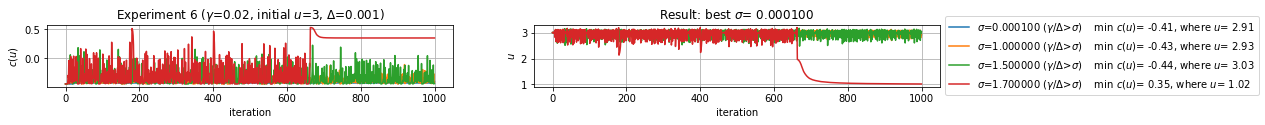

In [ ]:
# Parameter settings
N = 100
max_iter_list = [100,100,100,1000,1000,1000]
r_list = [1e-3,1e-3,1e-3,2e-3,2e-3,2e-2]
u_init_list = [-2.5,-2.5,-2.5, 3,3,3]
delta_list = [1e-6, 1e-4, 1e-3,1e-6, 1e-4, 1e-3]
sigma_list = [1e-4,1,1.5,1.7]

# Define simple random search function
def d_gauss(u,sigma,delta): 
  un = np.random.normal(u, sigma, N)
  c_exp = 0
  for i in range(N):
    c_exp = c_exp + (c(u+delta*un[i]) - c(u))*un[i]
  c_exp = c_exp/(N*delta)
  return c_exp

# Start experiments
for exp in range(len(r_list)):

  # Load display stuff
  figsize = (16,8)
  plt.figure(figsize=figsize)
  ax1 = plt.subplot(len(r_list),2,1); ax1.grid('on')
  ax2 = plt.subplot(len(r_list),2,2); ax2.grid('on')

  # Initialization settings
  max_iter = max_iter_list[exp]
  r = r_list[exp]
  delta = delta_list[exp]

  u_descent = [0 for i in range(max_iter)]
  c_descent = [0 for i in range(max_iter)]
  u_descent[0] = u_init_list[exp]
  c_descent[0] = c(u_descent[0])

  u_best = u_descent[0]
  c_best = c_descent[0]
  sigma_best = sigma_list[0]
  
  # Set delta value
  for sigma in sigma_list:
    # Calculate interative update results
    for i in range(max_iter-1):
      u_plus = u_descent[i] - r*d_gauss(u_descent[i],sigma,delta)
      u_descent[i+1] = u_plus
      c_descent[i+1] = c(u_plus)
    
    # Compare results
    if c_descent[max_iter-1]<c_best:
      u_best = u_descent[max_iter-1]
      c_best = c_descent[max_iter-1]
      sigma_best = sigma

    # Draw results
    ax1.plot(range(max_iter),c_descent)
    if r/delta>sigma:
      ax2.plot(range(max_iter),u_descent, label="$\sigma$="+"%0.6f" % sigma+
               " (${\gamma}/{\Delta}$>$\sigma$)    min $c(u)$= "+str("%0.2f" % c_descent[max_iter-1])+
               ', where $u$= '+str("%0.2f" % u_descent[max_iter-1]))
    else:
      ax2.plot(range(max_iter),u_descent, label="$\sigma$="+"%0.6f" % sigma+
               "              min $c(u)$= "+str("%0.2f" % c_descent[max_iter-1])+
               ', where $u$= '+str("%0.2f" % u_descent[max_iter-1]))


# Add text on plots
  ax1.set_ylabel('$c(u)$')
  ax1.set_xlabel('iteration')
  ax1.set_title('Experiment '+str(exp+1)+' ($\gamma$='+str(r)+', initial $u$='+str(u_descent[0])+', $\Delta$='+str(delta)+')')

  ax2.set_ylabel('$u$')
  ax2.set_xlabel('iteration')
  ax2.set_title('Result: best $\sigma$= '+str("%0.6f" % sigma_best))
  ax2.legend(loc="center left", bbox_to_anchor=(1,0.5))

<font color='red'> To investigate how the $\gamma$ and $\Delta$ values relate to the choice of $\sigma$, six more experiments were conducted. Below are the results, as one can see, Experiment 2 and Experiment 5 are two baseline initialization settings. The result after a slight increase of $\gamma$ are respectively shown in Experiments 1 and 4; and the result after a slight increase of $\Delta$ are respectively shown in Experiments 3 and 6.

Comparing the red lines (with the largest $\sigma$) in Experiments 1 and 2, as well as Experiments 4 and 5. One may notice the large $\gamma$ makes the system act faster (make bigger corrections to $u$), which leads to a minor overshoot in both bases. However, with larger $\sigma$, it finds the global trend, and hence makes update decisions for $u$ relatviely more robust to the disturbance of local minimums. Thus, it is able to converge faster (less oscillation). Similarly, the effects of $\Delta$ in relation to $\sigma$ can be found in Experiments 2 and 3 as well as Experiments 5 and 6.
</font>

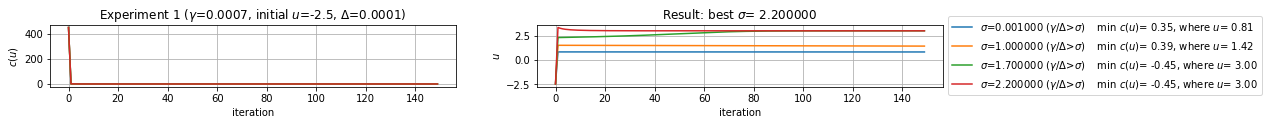

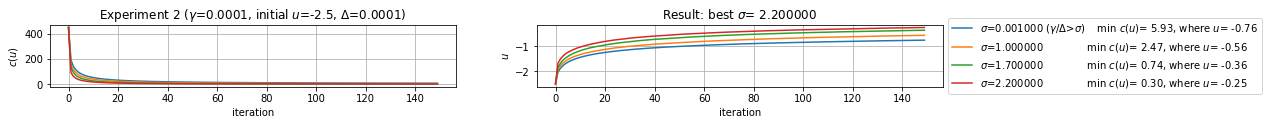

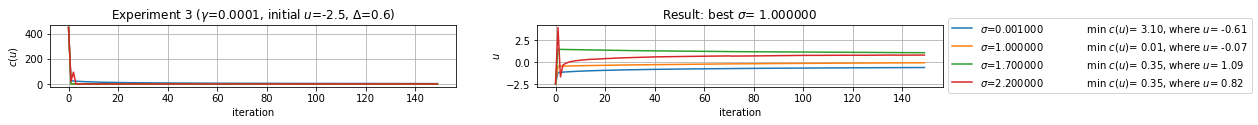

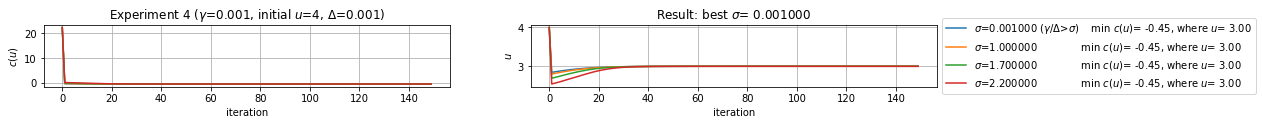

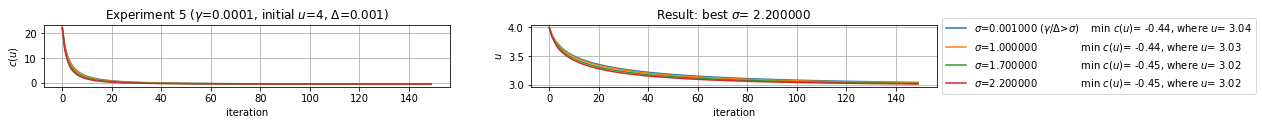

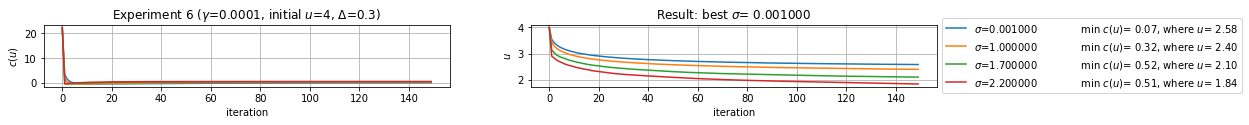

In [ ]:
# Parameter settings
N = 500
max_iter = 150
r_list = [7e-4,1e-4,1e-4,1e-3,1e-4,1e-4]
u_init_list = [-2.5,-2.5,-2.5, 4,4,4]
delta_list = [1e-4, 1e-4, 6e-1,1e-3, 1e-3, 3e-1]
sigma_list = [1e-3,1,1.7,2.2]

# Define simple random search function
def d_gauss(u,sigma,delta): 
  un = np.random.normal(u, sigma, N)
  c_exp = 0
  for i in range(N):
    c_exp = c_exp + (c(u+delta*un[i]) - c(u))*un[i]
  c_exp = c_exp/(N*delta)
  return c_exp

# Start experiments
for exp in range(len(r_list)):

  # Load display stuff
  figsize = (16,8)
  plt.figure(figsize=figsize)
  ax1 = plt.subplot(len(r_list),2,1); ax1.grid('on')
  ax2 = plt.subplot(len(r_list),2,2); ax2.grid('on')

  # Initialization settings
  r = r_list[exp]
  delta = delta_list[exp]

  u_descent = [0 for i in range(max_iter)]
  c_descent = [0 for i in range(max_iter)]
  u_descent[0] = u_init_list[exp]
  c_descent[0] = c(u_descent[0])

  u_best = u_descent[0]
  c_best = c_descent[0]
  sigma_best = sigma_list[0]
  
  # Set delta value
  for sigma in sigma_list:
    # Calculate interative update results
    for i in range(max_iter-1):
      u_plus = u_descent[i] - r*d_gauss(u_descent[i],sigma,delta)
      u_descent[i+1] = u_plus
      c_descent[i+1] = c(u_plus)
    
    # Compare results
    if c_descent[max_iter-1]<c_best:
      u_best = u_descent[max_iter-1]
      c_best = c_descent[max_iter-1]
      sigma_best = sigma

    # Draw results
    ax1.plot(range(max_iter),c_descent)
    if r/delta>sigma:
      ax2.plot(range(max_iter),u_descent, label="$\sigma$="+"%0.6f" % sigma+
               " (${\gamma}/{\Delta}$>$\sigma$)    min $c(u)$= "+str("%0.2f" % c_descent[max_iter-1])+
               ', where $u$= '+str("%0.2f" % u_descent[max_iter-1]))
    else:
      ax2.plot(range(max_iter),u_descent, label="$\sigma$="+"%0.6f" % sigma+
               "              min $c(u)$= "+str("%0.2f" % c_descent[max_iter-1])+
               ', where $u$= '+str("%0.2f" % u_descent[max_iter-1]))


# Add text on plots
  ax1.set_ylabel('$c(u)$')
  ax1.set_xlabel('iteration')
  ax1.set_title('Experiment '+str(exp+1)+' ($\gamma$='+str(r)+', initial $u$='+str(u_descent[0])+', $\Delta$='+str(delta)+')')

  ax2.set_ylabel('$u$')
  ax2.set_xlabel('iteration')
  ax2.set_title('Result: best $\sigma$= '+str("%0.6f" % sigma_best))
  ax2.legend(loc="center left", bbox_to_anchor=(1,0.5))

***Bonus:*** repeat (a.--e.) with the quadratic function $c(u) = u^\top H u$ where $u\in\mathbb{R}^2$ and $H = H^\top > 0$ is a positive-definite matrix of your choosing; you may want to use the `contour` function to visualize the results.

## dynamic systems

Consider the continuous-time linear time-invariant (CT-LTI) system

$$ \dot{x}(t) = A x(t). $$

a. Verify that $x(t) = e^{A t} x(0) $ is the trajectory obtained from initial state $x(0)$.

The remainder of the problem will focus on the following specific $A$ (obtained from a damped harmonic oscillator):
$$ A = \left[\begin{array}{cc} 0 & 1 \\ -\kappa & -\beta \end{array} \right].$$


A discrete-time linear time-invariant (DT-LTI) approximation of the original control system with timestep parameter $\Delta > 0$ is given by

$$ x(t + \Delta) \approx x(t) + \Delta\, \dot{x}(t) = \hat{A} x(t). $$

<font color='red'> Suppose $x(t) = e^{A t} x(0) $, we can calculate the first derivative of $x(t)$ by 
</font>

<font color='red'> 
$$ \dot{x}(t) = \frac{d\,x(t)}{dt}=\frac{d\,(e^{A t} x(0))}{dt}=x(0)\,\frac{d\,(e^{A t})}{dt}= x(0) \,(A\,e^{A t})=A\,(e^{A t} x(0))=A x(t). $$
</font>

<font color='red'> 
So, $ e^{A t} x(0) $ is a solution of $x(t)$ for the CT-LTU system
$ \dot{x}(t) = A x(t). $ The following code also proves the same.
</font>

Text(0.5, 1.0, 'Approximation of X(t)')

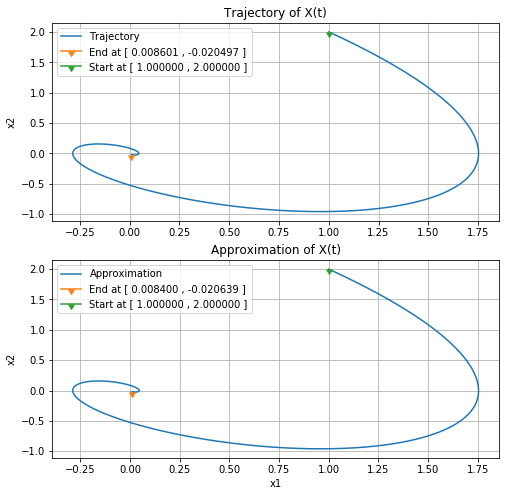

In [ ]:
from scipy.sparse.linalg import expm, expm_multiply

# Set parameters
k = 1
beta = 1
tstart = 0
tend = 10
tnum = 3001
A = np.matrix([[0.0, 1.0], [-k, -beta]])
xo = np.matrix([[1.0],[2.0]])

# Calculate approximation result
t = np.linspace(tstart,tend,tnum)
x_prox = np.zeros((2,len(t)))
for i in range(len(t)):
  if i == 0:
    x_prox[0,i] = xo[0,0]
    x_prox[1,i] = xo[1,0]
  else:
    x_prox[:,i] = x_prox[:,i-1]+(t[i]-t[i-1])*np.matmul(A,x_prox[:,i-1])

# Calculate trajectory result
x_traj = expm_multiply(A, xo, start=tstart, stop=tend, num=tnum, endpoint=True)
x_traj = np.reshape(np.transpose(x_traj),(2,len(t)))

# Plot results
figsize = (8,8)
plt.figure(figsize=figsize)

ax1 = plt.subplot(2,1,1); ax1.grid('on')
ax1.plot(x_traj[0,:],x_traj[1,:], label="Trajectory")
ax1.plot(x_traj[0,len(t)-1],x_traj[1,len(t)-1], marker=11, label="End at [ "+str("%06f" % x_traj[0,len(t)-1])+" , "+str("%06f" % x_traj[1,len(t)-1])+" ]")
ax1.plot(x_traj[0,0],x_traj[1,0], marker=11, label="Start at [ "+str("%06f" % x_traj[0,0])+" , "+str("%06f" % x_traj[1,0])+" ]")
ax1.legend(); ax1.set_ylabel("x2"); ax1.set_title("Trajectory of X(t)")

ax2 = plt.subplot(2,1,2); ax2.grid('on')
ax2.plot(x_prox[0,:],x_prox[1,:], label="Approximation")
ax2.plot(x_prox[0,len(t)-1],x_prox[1,len(t)-1], marker=11, label="End at [ "+str("%06f" % x_prox[0,len(t)-1])+" , "+str("%06f" % x_prox[1,len(t)-1])+" ]")
ax2.plot(x_prox[0,0],x_prox[1,0], marker=11, label="Start at [ "+str("%06f" % x_prox[0,0])+" , "+str("%06f" % x_prox[1,0])+" ]")
ax2.legend();ax2.set_xlabel("x1"); ax2.set_ylabel("x2"); ax2.set_title("Approximation of X(t)")

b. Determine the matrix $\hat{A}$.

<font color='red'> Mathematically, if we substitute $\dot{x}(t)=A x(t)$ into the approximation equation
$$ x(t + \Delta) \approx x(t) + \Delta\, (\dot{x}(t)) $$
Then we can get
$$  x(t + \Delta) \approx x(t) + \Delta\,( A x(t) ) = (I+\Delta A)\, x(t) = \hat{A} x(t).$$
Therefore, $\hat{A} = I+\Delta A$.
</font>

c. Run the (***forward Euler***) iteration $x^+ = \hat{A} x $ with $\kappa = 1$ and $\beta = 1$ with multiple values of the parameter $\Delta > 0$ and compare with the result obtained from the expression for $x$ from (a.) (you may want to use `np.expm` to numerically evaluate this expression).  Create two types of plots to illustrate your results: (i) states $x_1,x_2$ versus time $t$; (ii) second state $x_2$ versus first state $x_1$.  You should observe that trajectories are spirals that converge to the origin ($x_1,x_2 \rightarrow 0$); is there a value of $\Delta$ that prevents this from happening?

<font color='red'> The plots and numerical results are below. As one can observe, when $\Delta=1$ the trajectory no longer converges to $(x_1,x_2)=(0,0)$, instead it spins in a loop. 
</font>

Experiment 1: 
    delta Δ = 0.010000
    x(0.0)  = [1.000000,2.000000]
    x(10.0) = [0.007983,-0.020918]
Experiment 2: 
    delta Δ = 0.100000
    x(0.0)  = [1.000000,2.000000]
    x(10.0) = [0.000010,-0.023698]
Experiment 3: 
    delta Δ = 0.250000
    x(0.0)  = [1.000000,2.000000]
    x(10.0) = [-0.027562,-0.020280]
Experiment 4: 
    delta Δ = 0.500000
    x(0.0)  = [1.000000,2.000000]
    x(10.0) = [-0.168941,0.056314]
Experiment 5: 
    delta Δ = 1.000000
    x(0.0)  = [1.000000,2.000000]
    x(10.0) = [-3.000000,1.000000]


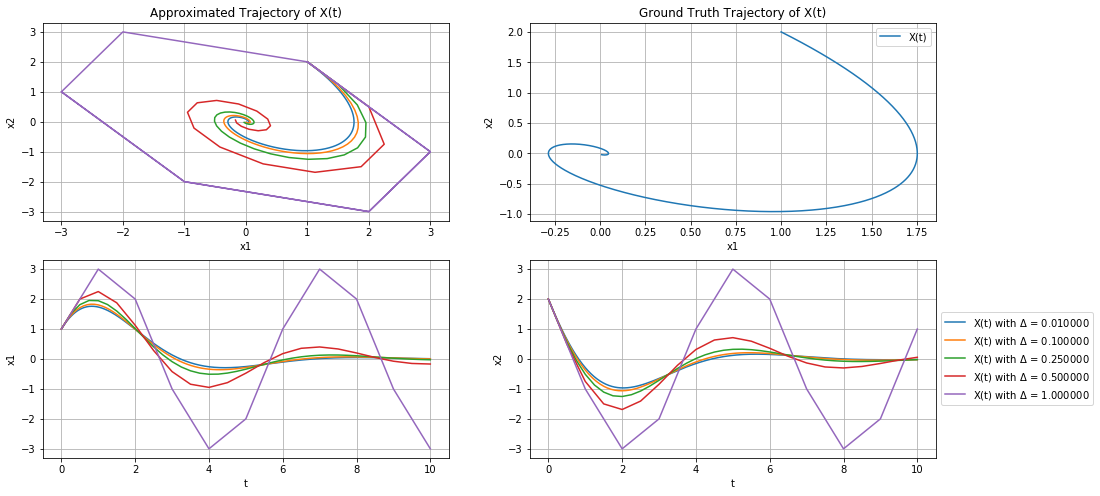

In [ ]:
from scipy.sparse.linalg import expm, expm_multiply

# Set parameters
k = 1
beta = 1
tstart = 0
tend = 10
tnum_list = [1001, 101, 41, 21, 11] # Change this to add more delta tests

A = np.matrix([[0.0, 1.0], [-k, -beta]])
xo = np.matrix([[1.0],[2.0]])

# Calculate trajectory result
x_traj = expm_multiply(A, xo, start=tstart, stop=tend, num=tnum_list[0], endpoint=True)
x_traj = np.reshape(np.transpose(x_traj),(2,tnum_list[0]))

# Plot results
figsize = (16,8)
plt.figure(figsize=figsize)
ax1 = plt.subplot(2,2,2); ax1.grid('on')
ax2 = plt.subplot(2,2,1); ax2.grid('on')
ax3 = plt.subplot(2,2,3); ax3.grid('on')
ax4 = plt.subplot(2,2,4); ax4.grid('on')

ax1.plot(x_traj[0,:],x_traj[1,:], label="X(t)")
ax1.legend(); ax1.set_xlabel("x1"); ax1.set_ylabel("x2"); ax1.set_title("Ground Truth Trajectory of X(t)")

# Start experiments
for exp in range(len(tnum_list)):
  # Initialization
  tnum = tnum_list[exp]
  t = np.linspace(tstart,tend,tnum)
  delta = t[1]-t[0]
  x_prox = np.zeros((2,len(t)))
  A_hat = np.identity(2)+delta*A

  # Calculate forward Euler result
  for i in range(len(t)):
    if i == 0:
      x_prox[0,i] = xo[0,0]
      x_prox[1,i] = xo[1,0]
    else:
      x_prox[:,i] = np.matmul(A_hat,x_prox[:,i-1])

  # Print results
  print("Experiment "+str(exp+1)+": \n    delta Δ = "+str("%04f" % delta)+"\n    "+
        "x("+str(t[0])+")  = ["+str("%06f" % x_prox[0,0])+","+str("%06f" % x_prox[1,0])+
        "]\n    x("+str(t[len(t)-1])+") = ["+str("%06f" % x_prox[0,len(t)-1])+","+str("%06f" % x_prox[1,len(t)-1])+"]")

  # Plot results
  ax2.plot(x_prox[0,:],x_prox[1,:])
  ax3.plot(t,x_prox[0,:])
  ax4.plot(t,x_prox[1,:], label="X(t) with $\Delta$ = "+str("%04f" % delta))

# Add text to plots
ax2.set_xlabel("x1"); ax2.set_ylabel("x2"); ax2.set_title("Approximated Trajectory of X(t)")
ax3.set_xlabel("t"); ax3.set_ylabel("x1"); 
ax4.legend(loc="center left", bbox_to_anchor=(1,0.5));ax4.set_xlabel("t"); ax4.set_ylabel("x2"); 

d. Repeat (c.) with $\beta = -1$.  You should observe that trajectories are divergent spirals ($x_1,x_2 \rightarrow \infty$).



Experiment 1: 
    delta Δ = 0.010000
    x(0.0)  = [1.000000,2.000000]
    x(10.0) = [85.312679,-210.251844]
Experiment 2: 
    delta Δ = 0.100000
    x(0.0)  = [1.000000,2.000000]
    x(10.0) = [229.786619,-135.288841]
Experiment 3: 
    delta Δ = 0.250000
    x(0.0)  = [1.000000,2.000000]
    x(10.0) = [443.023892,113.408576]
Experiment 4: 
    delta Δ = 0.500000
    x(0.0)  = [1.000000,2.000000]
    x(10.0) = [425.327157,499.080298]
Experiment 5: 
    delta Δ = 1.000000
    x(0.0)  = [1.000000,2.000000]
    x(10.0) = [-243.000000,243.000000]


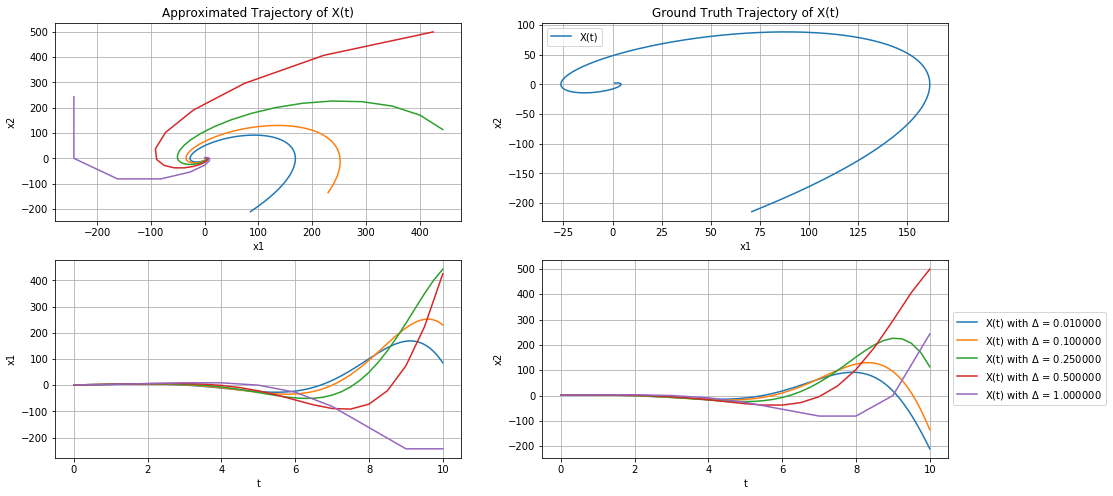

In [ ]:
from scipy.sparse.linalg import expm, expm_multiply

# Set parameters
k = 1
beta = -1
tstart = 0
tend = 10
tnum_list = [1001, 101, 41, 21, 11] # Change this to add more delta tests

A = np.matrix([[0.0, 1.0], [-k, -beta]])
xo = np.matrix([[1.0],[2.0]])

# Calculate trajectory result
x_traj = expm_multiply(A, xo, start=tstart, stop=tend, num=tnum_list[0], endpoint=True)
x_traj = np.reshape(np.transpose(x_traj),(2,tnum_list[0]))

# Plot results
figsize = (16,8)
plt.figure(figsize=figsize)
ax1 = plt.subplot(2,2,2); ax1.grid('on')
ax2 = plt.subplot(2,2,1); ax2.grid('on')
ax3 = plt.subplot(2,2,3); ax3.grid('on')
ax4 = plt.subplot(2,2,4); ax4.grid('on')

ax1.plot(x_traj[0,:],x_traj[1,:], label="X(t)")
ax1.legend(); ax1.set_xlabel("x1"); ax1.set_ylabel("x2"); ax1.set_title("Ground Truth Trajectory of X(t)")

# Start experiments
for exp in range(len(tnum_list)):
  # Initialization
  tnum = tnum_list[exp]
  t = np.linspace(tstart,tend,tnum)
  delta = t[1]-t[0]
  x_prox = np.zeros((2,len(t)))
  A_hat = np.identity(2)+delta*A

  # Calculate forward Euler result
  for i in range(len(t)):
    if i == 0:
      x_prox[0,i] = xo[0,0]
      x_prox[1,i] = xo[1,0]
    else:
      x_prox[:,i] = np.matmul(A_hat,x_prox[:,i-1])

  # Print results
  print("Experiment "+str(exp+1)+": \n    delta Δ = "+str("%04f" % delta)+"\n    "+
        "x("+str(t[0])+")  = ["+str("%06f" % x_prox[0,0])+","+str("%06f" % x_prox[1,0])+
        "]\n    x("+str(t[len(t)-1])+") = ["+str("%06f" % x_prox[0,len(t)-1])+","+str("%06f" % x_prox[1,len(t)-1])+"]")

  # Plot results
  ax2.plot(x_prox[0,:],x_prox[1,:])
  ax3.plot(t,x_prox[0,:])
  ax4.plot(t,x_prox[1,:], label="X(t) with $\Delta$ = "+str("%04f" % delta))

# Add text to plots
ax2.set_xlabel("x1"); ax2.set_ylabel("x2"); ax2.set_title("Approximated Trajectory of X(t)")
ax3.set_xlabel("t"); ax3.set_ylabel("x1"); 
ax4.legend(loc="center left", bbox_to_anchor=(1,0.5));ax4.set_xlabel("t"); ax4.set_ylabel("x2"); 

e. Repeat (c.) with $\beta = 0$.  You should observe that the (CT-LTI) trajectories are circles (because $\beta = 0$ corresponds to an energy-conserving oscillator), whereas the (DT-LTI) trajectories are divergent spirals (because this simulation algorithm does not preserve energy).



Experiment 1: 
    delta Δ = 0.010000
    x(0.0)  = [1.000000,2.000000]
    x(10.0) = [-2.025516,-1.192942]
Experiment 2: 
    delta Δ = 0.100000
    x(0.0)  = [1.000000,2.000000]
    x(10.0) = [-3.105861,-1.969187]
Experiment 3: 
    delta Δ = 0.250000
    x(0.0)  = [1.000000,2.000000]
    x(10.0) = [-5.587765,-5.028635]
Experiment 4: 
    delta Δ = 0.500000
    x(0.0)  = [1.000000,2.000000]
    x(10.0) = [-6.388968,-19.820745]
Experiment 5: 
    delta Δ = 1.000000
    x(0.0)  = [1.000000,2.000000]
    x(10.0) = [64.000000,-32.000000]


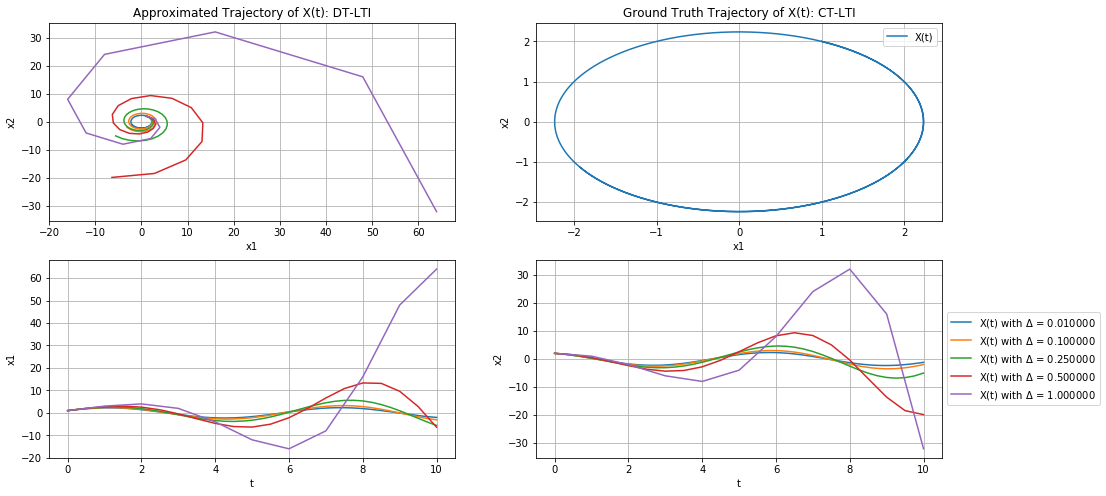

In [ ]:
from scipy.sparse.linalg import expm, expm_multiply

# Set parameters
k = 1
beta = 0
tstart = 0
tend = 10
tnum_list = [1001, 101, 41, 21, 11] # Change this to add more delta tests

A = np.matrix([[0.0, 1.0], [-k, -beta]])
xo = np.matrix([[1.0],[2.0]])

# Calculate trajectory result
x_traj = expm_multiply(A, xo, start=tstart, stop=tend, num=tnum_list[0], endpoint=True)
x_traj = np.reshape(np.transpose(x_traj),(2,tnum_list[0]))

# Plot results
figsize = (16,8)
plt.figure(figsize=figsize)
ax1 = plt.subplot(2,2,2); ax1.grid('on')
ax2 = plt.subplot(2,2,1); ax2.grid('on')
ax3 = plt.subplot(2,2,3); ax3.grid('on')
ax4 = plt.subplot(2,2,4); ax4.grid('on')

ax1.plot(x_traj[0,:],x_traj[1,:], label="X(t)")
ax1.legend(); ax1.set_xlabel("x1"); ax1.set_ylabel("x2"); ax1.set_title("Ground Truth Trajectory of X(t): CT-LTI")

# Start experiments
for exp in range(len(tnum_list)):
  # Initialization
  tnum = tnum_list[exp]
  t = np.linspace(tstart,tend,tnum)
  delta = t[1]-t[0]
  x_prox = np.zeros((2,len(t)))
  A_hat = np.identity(2)+delta*A

  # Calculate forward Euler result
  for i in range(len(t)):
    if i == 0:
      x_prox[0,i] = xo[0,0]
      x_prox[1,i] = xo[1,0]
    else:
      x_prox[:,i] = np.matmul(A_hat,x_prox[:,i-1])

  # Print results
  print("Experiment "+str(exp+1)+": \n    delta Δ = "+str("%04f" % delta)+"\n    "+
        "x("+str(t[0])+")  = ["+str("%06f" % x_prox[0,0])+","+str("%06f" % x_prox[1,0])+
        "]\n    x("+str(t[len(t)-1])+") = ["+str("%06f" % x_prox[0,len(t)-1])+","+str("%06f" % x_prox[1,len(t)-1])+"]")

  # Plot results
  ax2.plot(x_prox[0,:],x_prox[1,:])
  ax3.plot(t,x_prox[0,:])
  ax4.plot(t,x_prox[1,:], label="X(t) with $\Delta$ = "+str("%04f" % delta))

# Add text to plots
ax2.set_xlabel("x1"); ax2.set_ylabel("x2"); ax2.set_title("Approximated Trajectory of X(t): DT-LTI")
ax3.set_xlabel("t"); ax3.set_ylabel("x1"); 
ax4.legend(loc="center left", bbox_to_anchor=(1,0.5));ax4.set_xlabel("t"); ax4.set_ylabel("x2"); 

f. Analytically differentiate the expression for $x(t)$ from (a) with respect to the initial state $x(0)$.

<font color='red'> By definition $x(t) = e^{A t} x(0)$,
$$\frac{d\,x(t)}{d\,x(0)} = \frac{d\,e^{A t} x(0)}{d\,x(0)} =e^{A t}$$
</font>

g. Differentiate the (DT-LTI) iteration with respect to initial state and compare with the result from (f.) for $t = 1$ $\kappa = 1$ and $\beta = 0, +1, -1$.  (***Hint:*** you may consider computing the derivative analytically or numerically, e.g. using finite differences.)

<font color='red'> In problem (d), we found that $$  x(t + \Delta) \approx  \hat{A} x(t) = (I+\Delta A)\,x(t)$$
This equation can be rewritten as
$$  x(t ) \approx  \hat{A} x(t- \Delta) = (I+\Delta A)\,x(t - \Delta)$$
Now if we recursively expand this equation, we can get
$$  x(t ) \approx  (I+\Delta A)\,x(t - \Delta)$$
$$  x(t ) \approx  (I+\Delta A)^2\,x(t - 2\Delta)=(I+\Delta A)^3\,x(t - 3\Delta)=...=(I+\Delta A)^k\,x(t - k\Delta)$$

Eventually, suppose we know $t=N\Delta$
Then,
</font>

<font color='red'>
$$  x(t ) = x(N\Delta)\approx  (I+\Delta A)^N\,x(t - N\Delta)=(I+\Delta A)^N\,x(0)$$
</font>

<font color='red'>
Then we can conduct defferentiation with respect to the initial state $x(0)$ easily by 

$$\frac{d\,x(t)}{d\,x(0)} = \frac{d\,(I+\Delta A)^N\,x(0)}{d\,x(0)} =(I+\Delta A)^N$$
</font>

<font color='red'>
In summary, through CT-LTI we conclude that
$\frac{d\,x(t)}{d\,x(0)} =e^{A t}$.
On the other hand, we derive from DT-LTI that
$\frac{d\,x(t)}{d\,x(0)} \approx(I+\Delta A)^N=\hat{A}\,^N$, where $t=N\Delta$. So let's write some code to compare the results!
</font>

In [ ]:
from scipy.sparse.linalg import expm, expm_multiply

# Set parameters
beta_list = [-1, 0,1]
delta = 1e-3
t = 1.0
k=1
N = int(t/delta)

# Calculate CT-LTI result
ct_lti = expm(t*A)
print("CT-LTI dx(t)/dx(0) result:")
print(np.matrix(ct_lti))

# Calculate DT-LTI result
for i in range(len(beta_list)):
  beta = beta_list[i]
  A = np.matrix([[0.0, 1.0], [-k, beta]])
  A_hat = np.identity(2)+delta*A
  dt_lti = np.identity(2)
  for n in range(N):
    dt_lti = np.matmul(dt_lti,A_hat)
  print("\nDT-LTI dx(t)/dx(0) result:  β="+str(beta))
  print(np.matrix(dt_lti))



CT-LTI dx(t)/dx(0) result:
[[ 0.65970015  0.5335072 ]
 [-0.5335072   0.12619296]]

DT-LTI dx(t)/dx(0) result:  β=-1
[[ 0.6597634   0.53383724]
 [-0.53383724  0.12592616]]

DT-LTI dx(t)/dx(0) result:  β=0
[[ 0.54057281  0.84189165]
 [-0.84189165  0.54057281]]

DT-LTI dx(t)/dx(0) result:  β=1
[[ 0.34392472  1.45005069]
 [-1.45005069  1.79397541]]


***Bonus:*** repeat (a.--g.) for the control system $\dot{x} = A x + B u$ with trajectory expression
$$ x(t) = e^{A t} x(0) + \int_0^t e^{A (t - \tau)} B u(\tau) d\tau $$
using a sinusoidal input $u(t) = \sin(\omega t)$ ($\hat{A}$ will be the same in (b.), but you'll need to find $\hat{B}$ for the subsequent subproblems).